In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [323]:
city_data = pd.read_csv("C:\\Users\\fmsay\\Documents\\UT_DATA_CHALLENGES\\matplotlib_challenge\\city_data.csv")
ride_data = pd.read_csv("C:\\Users\\fmsay\\Documents\\UT_DATA_CHALLENGES\\matplotlib_challenge\\ride_data.csv")

In [324]:
df = pd.DataFrame.merge(ride_data,city_data, on = 'city' , how = 'left')
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [325]:
df_avgfare = pd.DataFrame({'AvgFare':df.groupby(["city","driver_count","type"]).fare.mean()}).reset_index("driver_count")
df_ridecount = pd.DataFrame({'RideCount':df.groupby(["city","driver_count","type"]).ride_id.count()}).reset_index("city")
df_chart =   pd.DataFrame.merge(df_avgfare, df_ridecount, on =["city","driver_count","type"] , how = 'inner').reset_index()
df_chart = df_chart.sort_values("type")
df_chart = df_chart.rename(columns={"type":"City Types"} )
df_chart['sizes'] = df_chart.driver_count * 10
df_chart.head()

,City Types,city,driver_count,AvgFare,RideCount,sizes
100,Rural,Taylorhaven,1,42.263333,6,10
57,Rural,Newtonview,1,36.745000,4,10
55,Rural,New Ryantown,2,43.278333,6,20
92,Rural,South Jennifer,7,35.264286,7,70
95,Rural,South Marychester,1,41.870000,8,10


# Bubble Plot of Ride Sharing Data

In [326]:
### Obtain the x and y coordinates for each of the three city types

### Build the scatter plots for each city types

### Incorporate the other graph properties

### Create a legend

### Incorporate a text label regarding circle size

### Save Figure


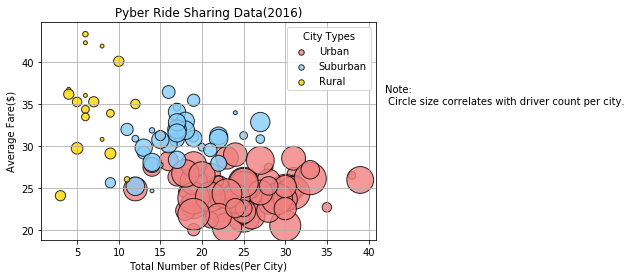

In [331]:

plt.scatter(uc["RideCount"],uc["AvgFare"],s = uc["driver_count"]*15, marker="o",color ="LightCoral", edgecolors="black", alpha =0.8, label = "Urban")
plt.scatter(suc["RideCount"],suc["AvgFare"],s = suc["driver_count"]*15, marker="o",color ="LightSkyBlue", edgecolors="black", alpha =0.8, label = "Suburban")
plt.scatter(rc["RideCount"],rc["AvgFare"],s = rc["driver_count"]*15, marker="o",color ="Gold", edgecolors="black",alpha =0.8, label = "Rural")
plt.grid()

plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")

Urban = df_chart[df_chart["City Types"]=="Urban"]
Suburban = df_chart[df_chart["City Types"]=="Suburban"]
Rural = df_chart[df_chart["City Types"]=="Rural"]

lgnd=plt.legend(title="City Types", loc = "upper right")
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]

plt.text(42,35,"Note:\n Circle size correlates with driver count per city.")
plt.savefig("pyber_scatter_plot.png", bbox_inches="tight")

plt.show()

# Total Fares by City Type

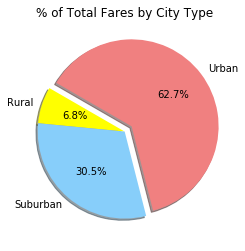

In [332]:
### Calculate Type Percents 
### Build Pie Chart 
### Save Figure

TotalFare = sum(df.fare)
df_fp = pd.DataFrame({'fp':df.groupby(["type"]).fare.sum()})/TotalFare * 100
df_fp = df_fp.round(1).reset_index()
df_fp = pd.DataFrame(df_fp)
cols = [ 'yellow', 'lightskyblue','LightCoral']
df_fp.set_index('type')
labelsp = df_fp.type
plt.title("% of Total Fares by City Type")
explode = (0,0,0.1)

plt.pie(df_fp.fp,labels = labelsp,explode=explode, startangle=150,  autopct="%1.1f%%",  shadow=True, colors = colors)
plt.savefig("pyber_pie_total_fares_per_type.png")

plt.show()

# Total Rides by City Type

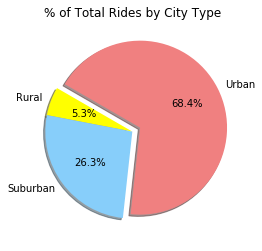

In [333]:
### Calculate Ride Percents 
### Build Pie Chart 
### Save Figure

TotalRide = sum(df_chart.RideCount)
df_rp = pd.DataFrame({'rp':df_chart.groupby(["City Types"]).RideCount.sum()})/TotalRide * 100
df_rp = df_rp.round(1).reset_index()
df_rp = pd.DataFrame(df_rp)
cols = [ 'yellow', 'lightskyblue','LightCoral']
df_rp.set_index('City Types')
plt.title("% of Total Rides by City Type")
explode = (0,0,0.1)

plt.pie(df_rp.rp,labels = labelsp,explode=explode, startangle=150,  autopct="%1.1f%%",  shadow=True, colors = colors)
plt.savefig("pyber_pie_total_rides_per_type.png")

plt.show()

# Total Drivers by City Type

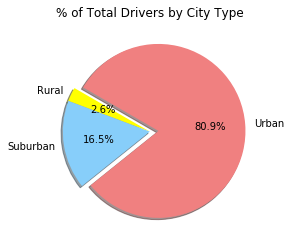

In [334]:
### Calculate Driver Percents 
### Build Pie Chart 
### Save Figure

TotalDrivers = sum(df_chart.driver_count)
df_dc = pd.DataFrame({'dc':df_chart.groupby(["City Types"]).driver_count.sum()})/TotalDrivers * 100
df_dc = df_dc.round(1).reset_index()
df_dc = pd.DataFrame(df_dc)
cols = [ 'yellow', 'lightskyblue','LightCoral']
df_dc.set_index('City Types')
plt.title("% of Total Drivers by City Type")
explode = (0,0,0.1)

plt.pie(df_dc.dc,labels = labelsp,explode=explode, startangle=150,  autopct="%1.1f%%",  shadow=True, colors = colors)
plt.savefig("pyber_pie_total_drivers_per_type.png")

plt.show()